# Decision Tree Classification

We will be exploring publicly available data from [LendingClub.com](www.lendingclub.com). Lending Club connects people who need money (borrowers) with people who have money (investors). Hopefully, as an investor you would want to invest in people who showed a profile of having a high probability of paying you back. We will try to create a model that will help predict this.

Here are what the columns represent:
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

In [1]:
# Import Packages 
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
# Read the Dataset
dataframe = pd.read_csv("/Users/devangpapinwar/Downloads/Refactored_Py_DS_ML_Bootcamp-master/15-Decision-Trees-and-Random-Forests/loan_data.csv")

In [3]:
# Dataframe Info
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [4]:
# First 10 elements
dataframe.head(10)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
5,1,credit_card,0.0788,125.13,11.904968,16.98,727,6120.041667,50807,51.0,0,0,0,0
6,1,debt_consolidation,0.1496,194.02,10.714418,4.00,667,3180.041667,3839,76.8,0,0,1,1
7,1,all_other,0.1114,131.22,11.002100,11.08,722,5116.000000,24220,68.6,0,0,0,1
8,1,home_improvement,0.1134,87.19,11.407565,17.25,682,3989.000000,69909,51.1,1,0,0,0
9,1,debt_consolidation,0.1221,84.12,10.203592,10.00,707,2730.041667,5630,23.0,1,0,0,0


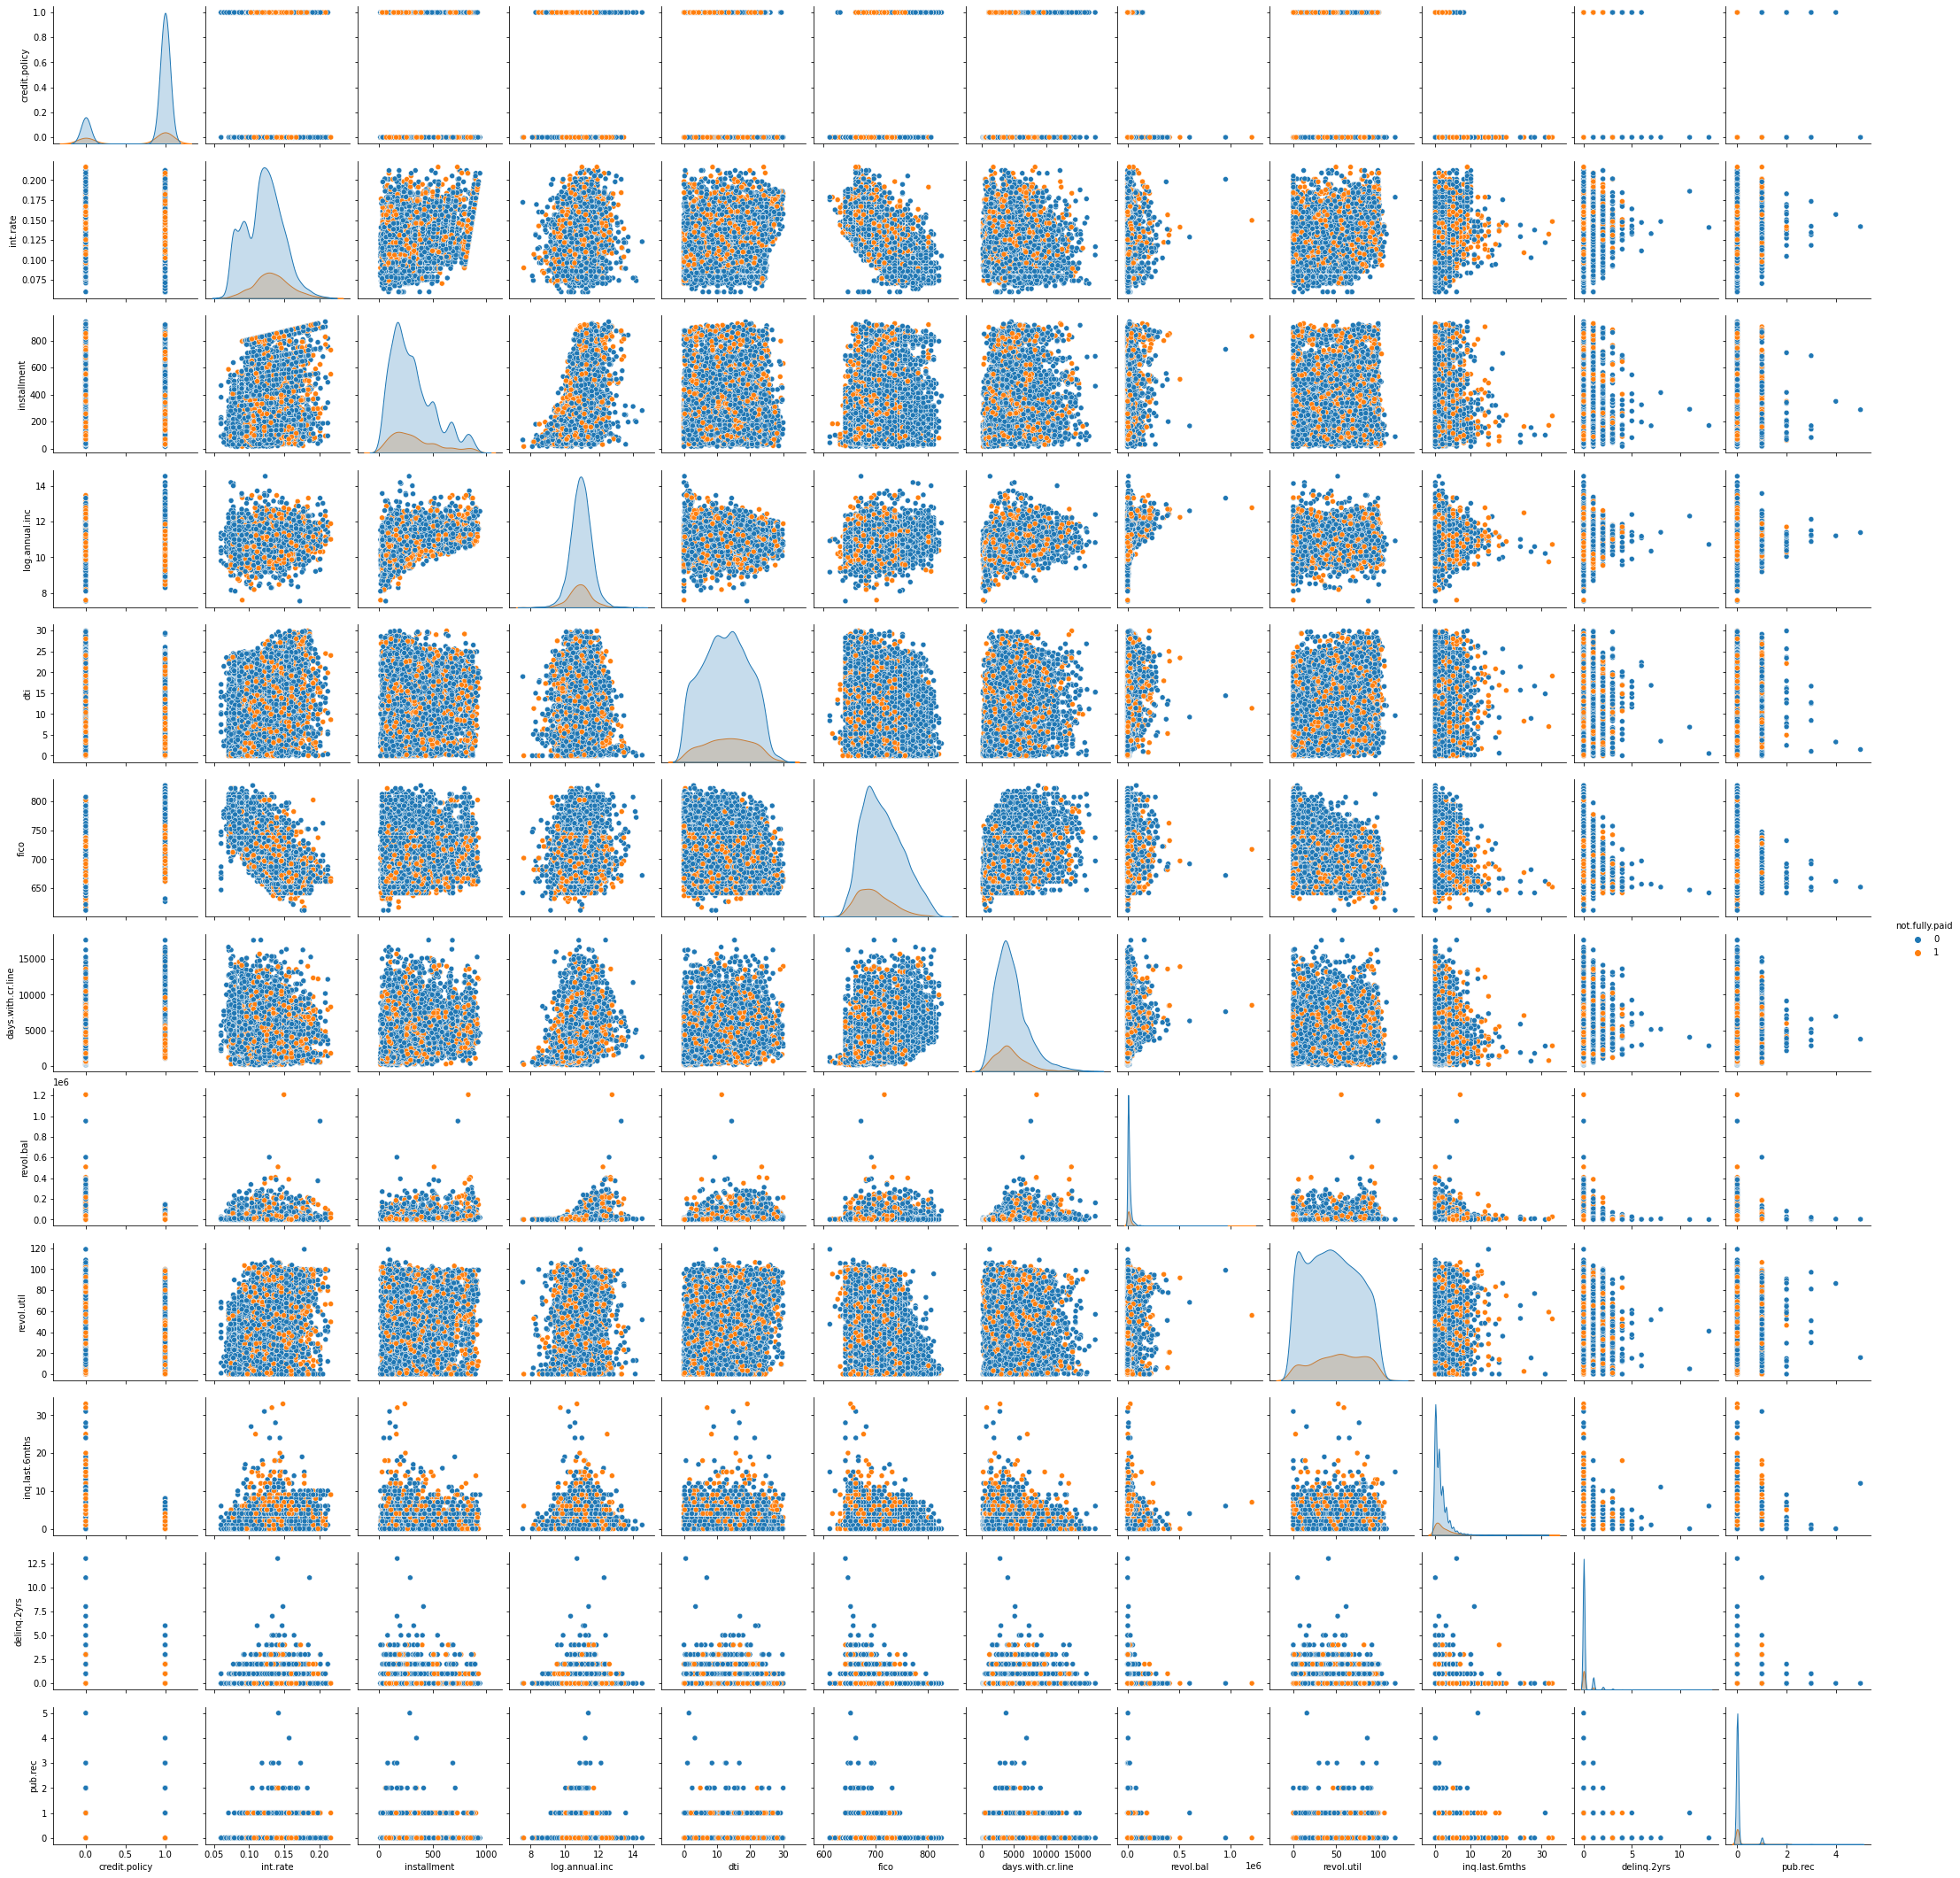

In [5]:
# Pairwise Relationship of the Numerical Data present in the Dataframe
sb.pairplot(dataframe , hue="not.fully.paid")

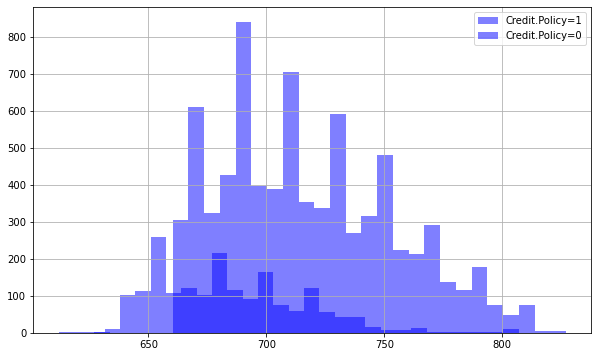

In [6]:
# Plot histograms for "fico" distributions based on binary value of credit policy
plt.figure(figsize=(10,6))
dataframe[dataframe["credit.policy"] == 1]["fico"].hist(alpha=0.5,color='blue',bins=30,label='Credit.Policy=1')
dataframe[dataframe["credit.policy"] == 0]["fico"].hist(alpha=0.5,color='blue',bins=30,label='Credit.Policy=0')
plt.legend()
plt.show()

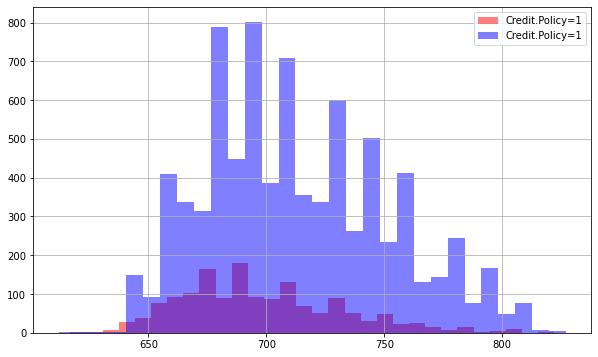

In [7]:
# Plot histograms for "fico" distributions based on binary value of not.fully.paid
plt.figure(figsize=(10,6))
dataframe[dataframe["not.fully.paid"] == 1]["fico"].hist(alpha=0.5,color= "red",bins=30,label='Credit.Policy=1')
dataframe[dataframe["not.fully.paid"] == 0]["fico"].hist(alpha=0.5,color='blue',bins=30,label='Credit.Policy=1')
plt.legend()
plt.show()

<AxesSubplot:xlabel='purpose', ylabel='count'>

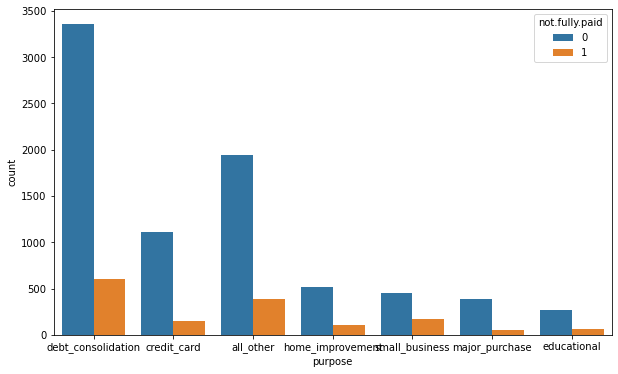

In [8]:
# Countplot Distribution of whether the loan is paid back based on the purpose of the loan
plt.figure(figsize=(10,6))
sb.countplot(x= "purpose" , hue="not.fully.paid" , data = dataframe )

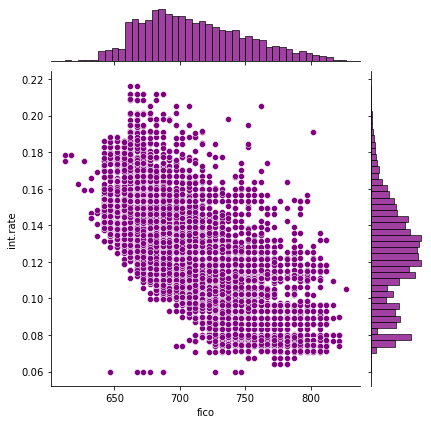

In [9]:
# Plots relationship between the Interest rate and Fico 
sb.jointplot(x = "fico" , y = "int.rate" , data = dataframe , color = "purple")

<Figure size 792x504 with 0 Axes>

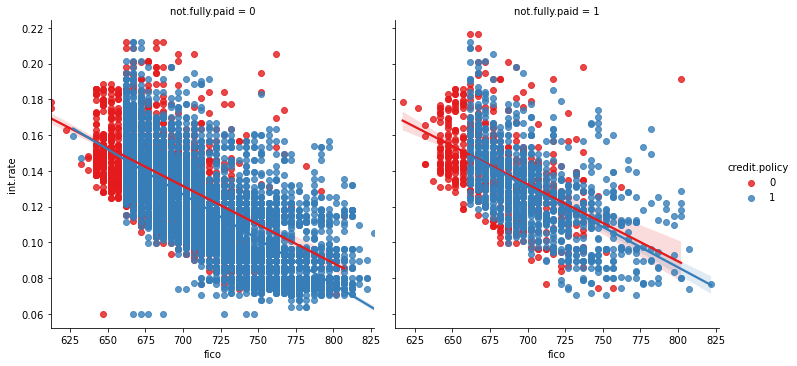

In [10]:
# The following lmplots to see if the trend differed between not.fully.paid and credit.policy
# Plots relationship between interest rate and fico for loan paid back or not paid back and credit policy
plt.figure(figsize=(11,7))
sb.lmplot(y = "int.rate" ,x = "fico" ,  data = dataframe , hue= "credit.policy" ,col= "not.fully.paid" , palette= "Set1")

In [11]:
# Split the string column into multiple columns of binary values 
final_data = pd.get_dummies(dataframe , columns = ["purpose"] , drop_first= True)

In [12]:
# Head elements
final_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [13]:
# Split the data into Training and Testing data
from sklearn.model_selection import train_test_split

X = final_data.drop("not.fully.paid" , axis = 1)
y = final_data["not.fully.paid"]

X_train , X_test , Y_train , Y_test = train_test_split(X , y , test_size = 0.30 , random_state = 101)

In [14]:
# Instantiate DecisionTreeClassifier and fit he training data on the model
from sklearn.tree import DecisionTreeClassifier

decisionTree = DecisionTreeClassifier()
decisionTree.fit(X_train , Y_train)

# Predict the Testing data
predictions = decisionTree.predict(X_test)
predictions

array([0, 1, 0, ..., 0, 0, 0])

In [15]:
# Generate Classification reports
from sklearn.metrics import confusion_matrix , classification_report

print("Confusion Matrix : \n" , confusion_matrix(Y_test , predictions))
print("Classification Report : \n" , classification_report (Y_test , predictions))

Confusion Matrix : 
 [[1993  438]
 [ 341  102]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.85      0.82      0.84      2431
           1       0.19      0.23      0.21       443

    accuracy                           0.73      2874
   macro avg       0.52      0.53      0.52      2874
weighted avg       0.75      0.73      0.74      2874



In [16]:
# Instantiate RandomForestClassifier and fit he training data on the model
from sklearn.ensemble import RandomForestClassifier

randomForest = RandomForestClassifier()
randomForest.fit(X_train , Y_train)

predictions = randomForest.predict(X_test)
predictions

array([0, 0, 0, ..., 0, 0, 0])

In [17]:
# Generate Classification reports
from sklearn.metrics import confusion_matrix , classification_report

print("Confusion Matrix : \n" , confusion_matrix(Y_test , predictions))
print("Classification Report : \n" , classification_report (Y_test , predictions))

Confusion Matrix : 
 [[2418   13]
 [ 432   11]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.85      0.99      0.92      2431
           1       0.46      0.02      0.05       443

    accuracy                           0.85      2874
   macro avg       0.65      0.51      0.48      2874
weighted avg       0.79      0.85      0.78      2874

